<a href="https://colab.research.google.com/github/GLuarte/TareasX/blob/master/CERTAMEN_2_UDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [293]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np


In [294]:
url1='https://raw.githubusercontent.com/GLuarte/TareasX/master/WHO-COVID-19-global-data.csv'
url2='https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto33/IndiceDeMovilidad-IM_externo.csv'
url3='https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto8/UCI_T.csv'
url4='https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv'
url5='https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto33/IndiceDeMovilidad-IM_interno.csv'
data_ww=pd.read_csv(url1)
data_ww=data_ww[['Date_reported','Country','New_cases','Cumulative_cases','New_deaths','Cumulative_deaths']]
i_movE=pd.read_csv(url2)
i_movI=pd.read_csv(url5)
uci_t=pd.read_csv(url3)
cases_CL=pd.read_csv(url4)


In [295]:
#Date formating
dates=[]
dates2=[]
for i in range(len(data_ww)):
  dates.append(data_ww['Date_reported'][i][0:10])
for i in dates:
  dates2.append(datetime.date(int(i[0:4]),int(i[5:7]),int(i[8:10])))
data_ww.pop('Date_reported')
data_ww.insert(0,'Date_reported',dates2)

In [296]:

## casos x pais
def casos_pais(dfile, country, fecha):
  C=country
  for i,j in enumerate(dfile['Country']):
    if j==C and dfile['Date_reported'][i]==fecha:
      result1=(C,fecha,dfile['Cumulative_cases'][i])

  
  return result1

In [297]:

##Ranking x pais
def n_casos_pais(n,fecha,dfile):
  ind=[]
  for i,j in enumerate(dfile['Date_reported']):
    if(j==fecha):
      ind.append(i)

  rank=pd.DataFrame(dfile.loc[ind])
  rank=rank.sort_values('Cumulative_cases',axis=0,ascending=False)
  indx=[]
  for i in range(1,n+1):
    indx.append(i)
  rank=pd.DataFrame(rank[:n])
  #rank=rank.reindex(indx)
  rank=rank.reset_index(drop=True)
  rank=rank[['Date_reported','Country','Cumulative_cases']]

 

  return (rank)

In [298]:
# Max Fallecidos

def max_fallecidos(dfile):
  deaths=pd.DataFrame(dfile.sort_values('Cumulative_deaths',ascending=False))
  deaths.reset_index(drop=True)
  deaths=deaths[:1]
  for i in (deaths.index):
    max_death=((deaths['Country'][i],deaths['Cumulative_deaths'][i]))
  
  return max_death

In [299]:


#COMPARA FALLECIDOS X PAIS
def compara_fallecidos_paises(pais1,pais2,fecha,dfile):

  ind=[]
  for i,j in enumerate(dfile['Date_reported']):
    if(j==fecha):
      ind.append(i)

  d1=pd.DataFrame(dfile.loc[ind])
  
  comp=[]
  for i in (d1.index):
    
    if(d1['Country'][i]==pais1 or d1['Country'][i]==pais2):
      comp.append(d1['Country'][i])
      comp.append(int(d1['Cumulative_deaths'][i]))
      comp.append(int(d1['New_deaths'][i]))
    
  if (comp[1]>comp[4]):
    x1=comp[0]
    y1=comp[1]
  elif(comp[1]<comp[4]):
    x1=comp[3]
    y1=comp[4]
  else:
    x1='La cantidad de fallecidos acumulados es la misma'
    y1=comp[1]  

  if (comp[2]>comp[5]):
    x2=comp[0]
    y2=comp[2]
  elif(comp[2]<comp[5]):
    x2=comp[3]
    y2=comp[5]
  else:
    x2='La cantidad de nuevos fallecidos es la misma'
    y2=comp[2] 

  result4=(x1,y1,x2,y2)
  return result4




  


In [300]:
def contagiados_region(dfile):
  dfile=dfile.copy()  
  columns=list(dfile)

  del columns[:5]
  columns.remove('Tasa')

  dfile["sum"] = dfile[columns].sum(axis=1)

  dfile=dfile[['Region','sum']]
  regiones=[]
  for i in dfile['Region']:
    if i not in regiones:
      regiones.append(i)

  casos=np.zeros(len(regiones))
  for i,j in enumerate (dfile['sum']):
    for k in range(len(regiones)):

      if (dfile['Region'][i]==regiones[k]):
        casos[k]+=j

  casos.astype(int)
  casosxregion = {regiones[i]: casos[i] for i in range(len(regiones))}
  return(casosxregion)

In [301]:
def contagiados_file_r(dfile,region):
  
  ind=[]
  for i,j in enumerate(dfile['Region']):
    if(j==region):
      ind.append(i)
  d1=pd.DataFrame(dfile.loc[ind])
  columns=list(dfile)
  #print(columns)
  del columns[:5]
  columns.remove('Tasa')
  #print(columns)

  
  d1["sum"] = d1[columns].sum(axis=1)
  
  d1=d1[['Comuna','sum']]
  #print(d1)
  
  comunas=[]
  for i in d1['Comuna']:
    if i not in comunas:
      comunas.append(i)
  
  
  casos=np.zeros(len(comunas))
  
  for i in (d1.index):
    for k in range(len(comunas)):

      if (d1['Comuna'][i]==comunas[k]):
        casos[k]+=d1['sum'][i]

  casos.astype(int)
  casosxcomuna = {comunas[i]: casos[i] for i in range(len(comunas))}
  dcasosxcomuna=pd.DataFrame.from_dict(casosxcomuna, orient='index',columns=['Casos'])
  region=region+'.csv'
  region=region.lower()
  region=region.replace(' ','_')
  dcasosxcomuna.to_csv(region,index=True)
  return(dcasosxcomuna)

In [302]:
def internados_uci_region(dfile):
  dfile=dfile.copy()  
  regiones=list(dfile)
  regiones.remove('Region')
  ucixregion={i: uci_t[i][len(dfile)-1] for i in(regiones)}
  return ucixregion

In [303]:

def porcentaje_poblacion(dfile,region):
  dfile=dfile.copy()

  dfile=dfile[['Region',region]]
  
  porc=np.zeros(len(dfile)-2)
  pob=dfile[region][1]
  dfile=dfile.drop([0,1],axis=0)
  dfile=dfile.rename(columns={'Region':'Fecha'})
  for i in range(2,len(dfile)):
    porc[i-2]=dfile[region][i]*100/pob
  
  dfile.insert(2,'% Poblacion en UCI',porc)
  
  name='UCI_'+region+'_evolucion.png'
  dfile.plot(x='Fecha',y='% Poblacion en UCI',kind='line',color='red')
  plt.xticks(np.arange(0,len(dfile)+1,10))
  plt.tick_params(axis='x',rotation=45)
  plt.title('Evolucion UCI '+region,loc='center')
  plt.savefig(name,quality=100,format='png')
  plt.show()
  return(dfile)


In [304]:

def mov_comunaE(dfile1,comuna,fecha):
  dfile1=dfile1.copy()
  for i,j in enumerate(dfile1['Comuna']):
    if (j==comuna):
      indx_movE=dfile1[str(fecha)][i]
  return indx_movE

In [305]:
def mov_comunaI(dfile2,comuna,fecha):
  dfile2=dfile2.copy()
  for i,j in enumerate(dfile2['Comuna']):
    if (j==comuna):
      indx_movI=dfile2[str(fecha)][i]
  return indx_movI

In [306]:
def movi_comuna_file(dfile1,dfile2,comuna):
  dfile1=dfile1.copy()
  dfile2=dfile2.copy()
  dfile1=dfile1.drop(['Region','Codigo region','Codigo comuna','Superficie_km2','Poblacion'],axis=1)
  dfile2=dfile2.drop(['Region','Codigo region','Codigo comuna','Superficie_km2','Poblacion'],axis=1)
  for i,j in enumerate(dfile1['Comuna']):
    if (j==comuna):
      d1=pd.DataFrame(dfile1.loc[[i]])
      d2=pd.DataFrame(dfile2.loc[[i]])
  d1=d1.T
  #print(d1)
  d1=d1.drop(['Comuna'],axis=0)
  d1=d1.reset_index()
  d1=d1.rename(columns={'index':'Fecha',d1.columns[1]:'Indice externo'})

  d2=d2.T
  #print(d2)
  d2=d2.drop(['Comuna'],axis=0)
  d2=d2.reset_index()
  d2=d2.rename(columns={'index':'Fecha',d2.columns[1]:'Indice interno'})
  #print(d1)
  #print(d2)

  d2['Indice externo']=d1['Indice externo']
  plot_func(d2,comuna)

  comuna1='movilidad_'+comuna+'.csv'
  comuna1=comuna1.lower()
  comuna1=comuna1.replace(' ','_')
  d2.to_csv(comuna1,index=False)
  return d2

In [307]:
def plot_func(d2,comuna):
  plt.plot('Fecha','Indice interno',data=d2,marker='',color='red')
  plt.plot('Fecha','Indice externo',data=d2,marker='',color='cyan')
  plt.xticks(np.arange(0,len(d2)+1,10))
  plt.tick_params(axis='x',rotation=45)
  plt.title('Indices de movilidad '+comuna,loc='center')
  name2='Indices_movilidad_'+comuna+'_evolucion.png'
  plt.savefig(name2,quality=100,format='png')

  plt.show()

  d2.plot(x='Fecha',y='Indice interno',kind='line',color='red')
  plt.tick_params(axis='x',rotation=45)
  plt.title('Indices de movilidad interna '+comuna,loc='center')

  name1='Indice_movilidad_I_'+comuna+'_evolucion.png'
  plt.savefig(name1,quality=100,format='png')

  plt.show()
  d2.plot(x='Fecha',y='Indice externo',kind='line',color='cyan')
  plt.xticks(np.arange(0,len(d2)+1,10))
  plt.tick_params(axis='x',rotation=45)
  plt.title('Indices de movilidad externa '+comuna,loc='center')
  name2='Indice_movilidad_E_'+comuna+'_evolucion.png'
  plt.savefig(name2,quality=100,format='png')
  plt.show()

2020 4 18
Spain
País: Spain Fecha: 2020-04-18 Contagiados: 188578
5
  Date_reported                   Country  Cumulative_cases
0    2020-04-18  United States of America            665330
1    2020-04-18                     Spain            188578
2    2020-04-18                     Italy            172434
3    2020-04-18                   Germany            137439
4    2020-04-18        The United Kingdom            108696
('United States of America', 115980)
Mexico
Chile
('Mexico', 486, 'Mexico', 37)
{'Arica y Parinacota': 10883.0, 'Tarapacá': 31068.0, 'Antofagasta': 37013.0, 'Atacama': 3774.0, 'Coquimbo': 10950.0, 'Valparaíso': 53271.0, 'Metropolitana': 1125455.0, 'O’Higgins': 14328.0, 'Maule': 23347.0, 'Ñuble': 25135.0, 'Biobío': 33864.0, 'Araucanía': 37845.0, 'Los Ríos': 6354.0, 'Los Lagos': 15640.0, 'Aysén': 215.0, 'Magallanes': 19271.0}
Antofagasta
                           Casos
Antofagasta              21456.0
Calama                    8845.0
Maria Elena               1851.0


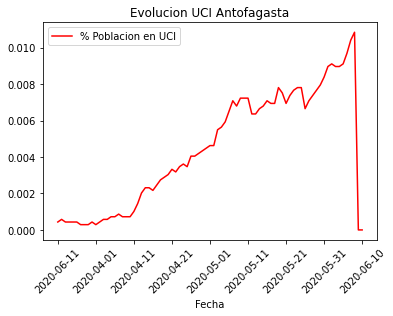

Tomé
1.791097133 1.901778154


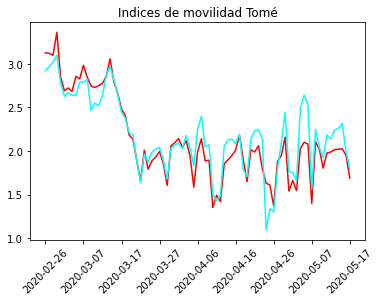

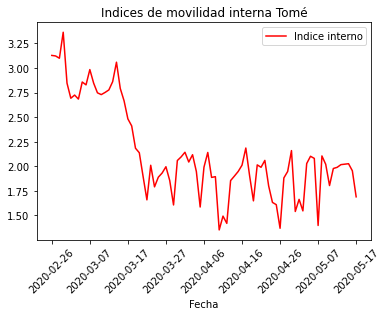

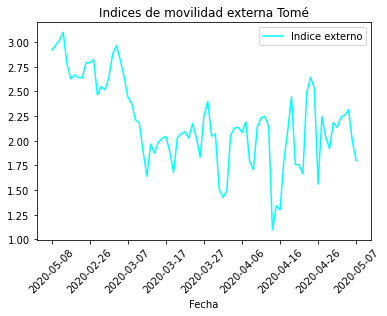

In [320]:
fecha=input().split()
fecha=datetime.date(int(fecha[0]),int(fecha[1]),int(fecha[2]))

#1
country=str(input())
result1=casos_pais(data_ww,country,fecha)
print('País:',result1[0],'Fecha:',result1[1],'Contagiados:',result1[2])

#2
n=int(input())
result2=n_casos_pais(n,fecha,data_ww)
print(result2)

#3
result3=max_fallecidos(data_ww)
print(result3)

#4
pais1=str(input())
pais2=str(input())
result4=compara_fallecidos_paises(pais1,pais2,fecha,data_ww)
print(result4)

#5
result5=contagiados_region(cases_CL)
print(result5)

#6
region=input()
result6=contagiados_file_r(cases_CL,region)
print(result6)  

#7
result7=internados_uci_region(uci_t)
print(result7)

#8
result8=porcentaje_poblacion(uci_t,region)

#9
comuna=input()

result9_1=mov_comunaE(i_movE,comuna,fecha)
result9_2=mov_comunaI(i_movI,comuna,fecha)
print(result9_1,result9_2)

#10
result10=movi_comuna_file(i_movE,i_movI,comuna)